# Benchmark Visualizations

## Setup

In [1]:
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Define color palette
sns.set(color_codes=True, style="white", context="talk", font_scale=1.5)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[1:5] + PALETTE[6:], n_colors=9)

In [3]:
def load_result(filename):
    """
    Loads results from specified file
    """
    inputs = open(filename, "r")
    lines = inputs.readlines()
    ls = []
    for line in lines:
        ls.append(ast.literal_eval(line))
    return ls


def plot_acc(col, ls, pos, n_train):
    if pos == 0:
        for i, l in enumerate(ls[pos]):
            col.plot(n_train, l, label=legends[i], lw=5)
    else:
        for l in ls[pos]:
            col.plot(n_train, l, lw=5)

In [4]:
prefixes = ["dt/", "rf/", "ht/", "mf/", "sdt/", "sdf/", "csf/"]
legends = [
    "decision tree",
    "random forest",
    "hoeffding tree",
    "mondrian forest",
    "stream decision tree",
    "stream decision forest",
    "cascade stream forest",
]
datasets = ["splice", "pendigits", "cifar10"]
ranges = [2400, 7500, 50100]

## Plot

In [5]:
acc_ls = []
time_ls = []
for dataset in datasets:
    acc_l = []
    time_l = []

    for prefix in prefixes:
        acc = np.mean(load_result(prefix + dataset + "_acc.txt"), axis=0)
        acc_l.append(acc)

        time = np.mean(load_result(prefix + dataset + "_train_t.txt"), axis=0)
        time_l.append(time)

    acc_ls.append(acc_l)
    time_ls.append(time_l)

ls = acc_ls + time_ls

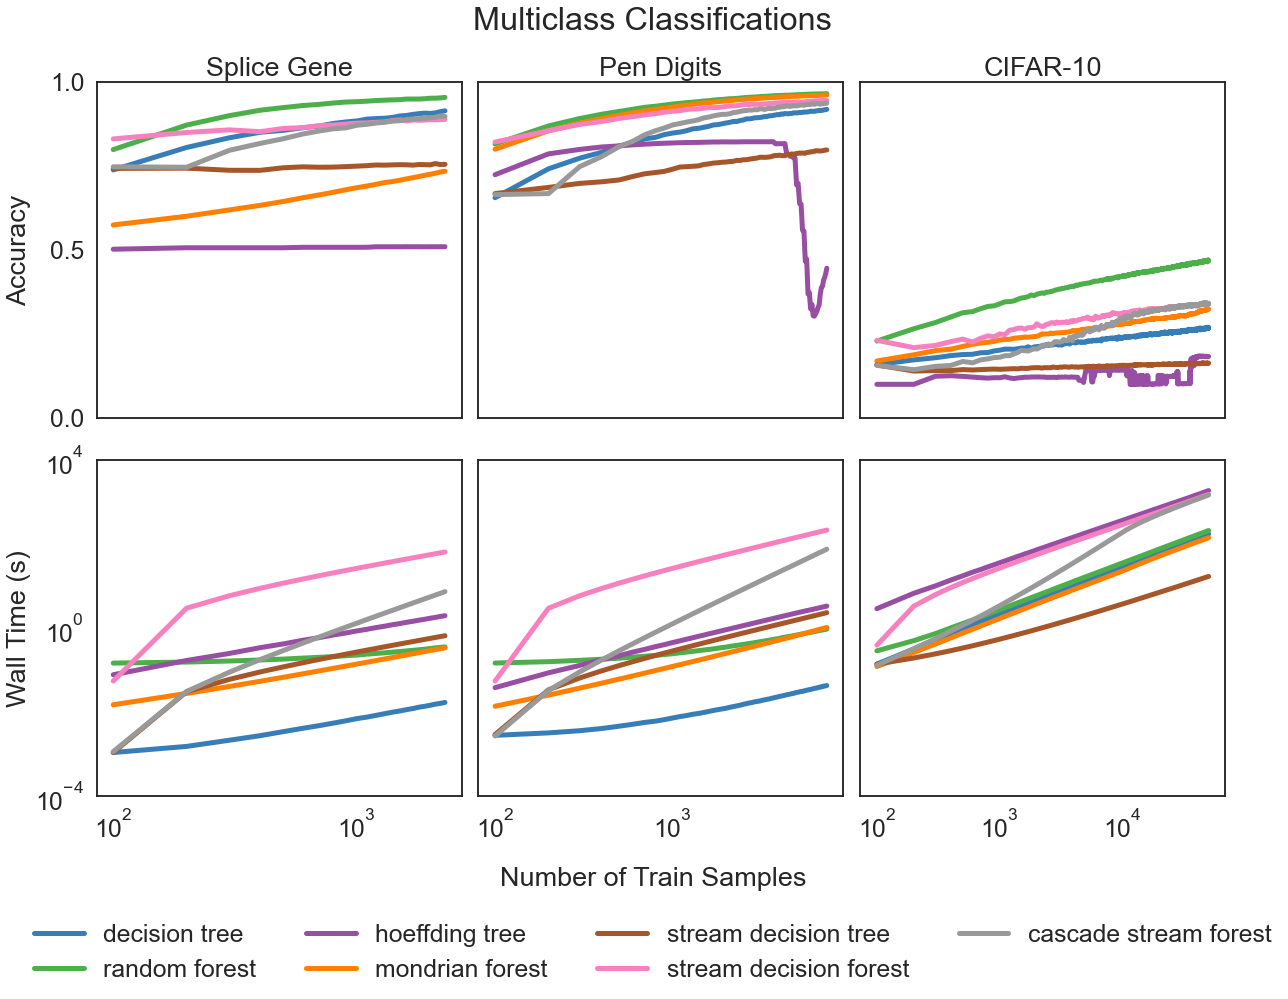

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17, 11), constrained_layout=True)

plt.suptitle("Multiclass Classifications", x=0.53, y=1.03, va="baseline")
fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
xtitles = ["Splice Gene", "Pen Digits", "CIFAR-10"]
ytitles = ["Accuracy", "Wall Time (s)"]
ylimits = [[0, 1], [1e-4, 1e4]]
yticks = [[0, 0.5, 1], [1e-4, 1e0, 1e4]]

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        count = 3 * i + j
        col.set_xscale("log")
        col.set_ylim(ylimits[i])

        n_train = range(100, ranges[j], 100)

        # Label x axis and plot figures
        if count < 3:
            col.set_xticks([])
            col.set_title(xtitles[j])
            plot_acc(col, ls, j, n_train)
        else:
            if count == 5:
                col.set_xticks([1e2, 1e3, 1e4, 1e5])
            else:
                col.set_xticks([1e2, 1e3, 1e4])
            col.set_yscale("log")
            plot_acc(col, ls, j + 3, n_train)

        # Label y axis
        if count % 3 == 0:
            col.set_yticks(yticks[i])
            col.set_ylabel(ytitles[i])
        else:
            col.set_yticks([])

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.2),
    bbox_transform=plt.gcf().transFigure,
    ncol=4,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("visual.pdf", transparent=True, bbox_inches="tight")